# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

#### Original Exploration

[18_Matplotlib_Box_Plots.ipynb](../2_Advanced/18_Matplotlib_Box_Plots.ipynb)  
[19_Exercise_Skill_Pay_Analysis.ipynb](../2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb)

### Import Libraries and Data

In [27]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Salary Distribution by Job Title

In [28]:
# filter for the job titles and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [29]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [30]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [31]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

### Plot Salary Distributions

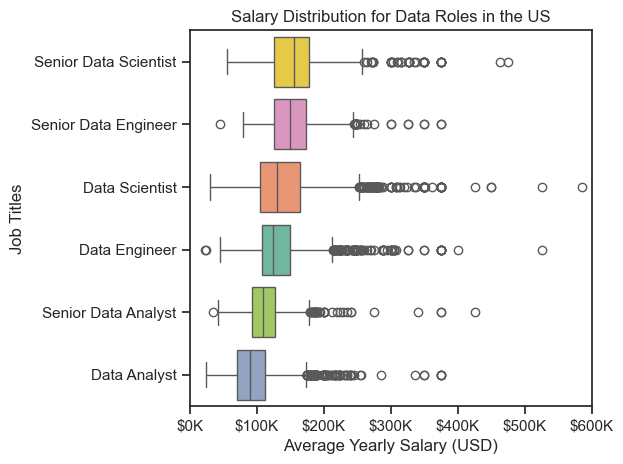

In [32]:
# Set seaborn theme
sns.set_theme(style="ticks")

# Create the boxplot
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short',hue='job_title_short',palette='Set2',order = job_order)

# Set plot title and axis labels
plt.title('Salary Distribution for Data Roles in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Job Titles')

# Set x-axis limits
plt.xlim(0, 600000)

# Format x-axis ticks as $XXXK
formatter = FuncFormatter(lambda x, pos: f'${int(x / 1000)}K')
plt.gca().xaxis.set_major_formatter(formatter)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


### Investigate Median Salary Vs Skill for Data 


In [33]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [46]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median',ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [48]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


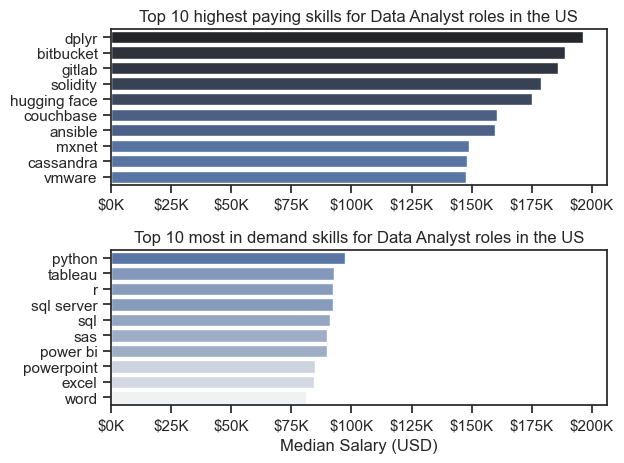

In [49]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

# Top 10 highest paying skills for Data Analyst roles in the US 
sns.barplot(data=df_DA_top_pay, x='median', y= df_DA_top_pay.index, ax=ax[0],hue='median', palette='dark:b_r')
ax[0].legend_.remove()

#df_DA_US_top_pay[::-1].plot(kind = 'barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 highest paying skills for Data Analyst roles in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 most in demand skills for Data Analyst roles in the US
sns.barplot(data=df_DA_skills, x='median', y= df_DA_skills.index, ax=ax[1],hue='median', palette='light:b')
ax[1].legend_.remove()

#df_DA_US_skills[::-1].plot(kind = 'barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in demand skills for Data Analyst roles in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()